 Criando gráficos em Python.

 O Python é muito bom para analisar dados e criar gráficos. Vou documentar a criação de alguns gráficos como histogramas e dispersão.

**Histogramas**

Criar histogramas com python é fácil utilizando bibliotecas como matplolib e seaborn por exemplo.

Escolhi um histograma das idades dos alunos presente no livro que utilizamos na aula de mecânica.

Uma das formas é definindo um bom bins, no caso do exemplo abaixo, escolhi um intervalor(range) entre 18 e 38 anos. Mas pode ser feito de um jeito manual também, escolhendo bins = 3 por exemplo.

21.333333333333332


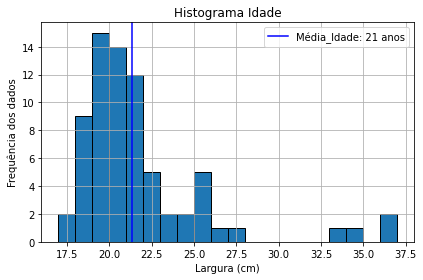

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tabela = pd.read_excel('Histogramas.xlsx') #Aqui importamos os dados em Excel


# Criando o histograma para os dados da altura
# bins = range(17, 38) é o intervalo dos dados entre as idades entre 17 e 38
# rwidth : É um parâmetro opcional, é a largura relativa das barras 
# edgecolor é a cor entre as barras
plt.hist(tabela['Idade'], bins=range(17,38),rwidth=1,edgecolor="black")

# Colocando o título no histograma
plt.title("Histograma Idade")

# Podemos calcular a média também para colocar na legenda do histograma, vamos utilizar a biblioteca numpy para isso
media_idades = np.mean(tabela["Idade"]) # np é como chamamos a bibioteca numpy e mean(média) a função que vamos utilizar
print(media_idades) # mostrando o valor da média: 21 anos

média = media_idades
cor = "blue"
plt.axvline(média, color=cor, label="Média_Idade: 21 anos")
plt.legend()

plt.grid()

# Colocando legenda nos Eixos
plt.xlabel("Largura (cm)")
plt.ylabel("Frequência dos dados")

plt.tight_layout()
 

plt.show()